<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/PCA_movie_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate database of movie ratings and perform

* PCA

* tSNE

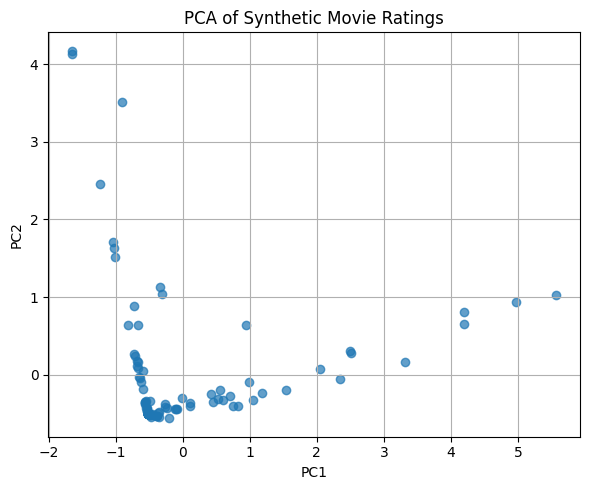

In [4]:
# Re-import required libraries after code environment reset
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)
n_users = 100
n_movies = 10

# Simulate latent preferences (e.g. 3 latent genres)
n_latent = 3
user_preferences = np.random.randn(n_users, n_latent)  # user liking of genres
movie_genres = np.random.randn(n_latent, n_movies)     # genre composition of movies

# Generate ratings as dot product of preferences and genres
ratings = user_preferences @ movie_genres + np.random.normal(0, 0.5, size=(n_users, n_movies))
ratings = np.clip(ratings, 1, 5)  # Clamp ratings to 1-5 like typical movie ratings

# Put into a DataFrame
movie_titles = [f"Movie_{i+1}" for i in range(n_movies)]
user_ids = [f"User_{i+1}" for i in range(n_users)]
df_ratings = pd.DataFrame(ratings, columns=movie_titles, index=user_ids)


# Perform PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(df_ratings)

# Plot the first two principal components
plt.figure(figsize=(6, 5))
plt.scatter(pcs[:, 0], pcs[:, 1], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Synthetic Movie Ratings")
plt.grid(True)
plt.tight_layout()
plt.show()


Perform tSNE on this movie dataset

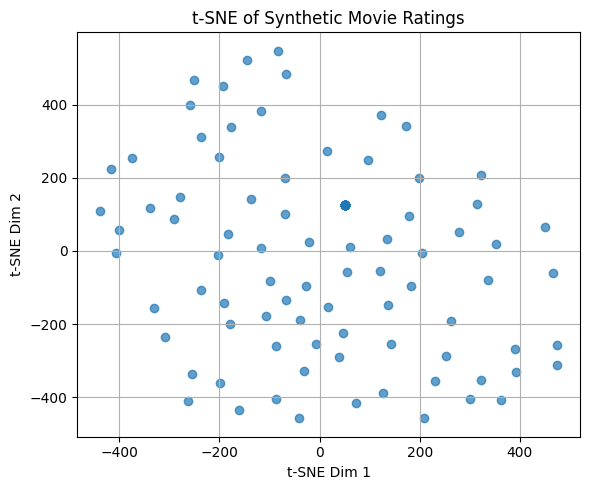

In [5]:
from sklearn.manifold import TSNE

# Perform t-SNE on the same movie ratings data
tsne = TSNE(n_components=2, perplexity=30, learning_rate=100, random_state=42)
tsne_result = tsne.fit_transform(df_ratings)

# Plot the t-SNE result
plt.figure(figsize=(6, 5))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7)
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.title("t-SNE of Synthetic Movie Ratings")
plt.grid(True)
plt.tight_layout()
plt.show()
